In [2]:
import numpy as np
import numpy.random as rd

In [36]:
def euclidean_distance(P, Q):
    P = np.array(P)
    Q = np.array(Q)
    return np.sqrt(np.sum((P - Q)**2))

In [105]:
# Constantes :
RANDOM_STATE = 42
NUMBER_OF_POINTS = 10

# Génération des points :
rd.seed(RANDOM_STATE)
np.set_printoptions(precision=2)
E = rd.random(NUMBER_OF_POINTS)
rd.seed(RANDOM_STATE+1)
F = rd.random(NUMBER_OF_POINTS)
L = [(float(x), float(y)) for x, y in zip(E, F)]
print(np.array(L))
M = np.zeros(shape=(NUMBER_OF_POINTS, NUMBER_OF_POINTS), dtype=float)
for i, p in enumerate(L):
    for j, q in enumerate(L):
        M[i, j] = euclidean_distance(p, q)

print(M)
        

def shortest_distance(c, L):
    min_dist = euclidean_distance(c[0], L[0])
    best_i = 0
    best_j = 0

    for i, p in enumerate(L):
        for j, q in enumerate(c):
            d = euclidean_distance(p, q)
            if d < min_dist:
                min_dist = d
                best_i, best_j = i, j
    # best_i is the nearest point from the departure set
    # best_j is the nearest point in the arrrival set            
    return best_i, best_j            

def ppp(L, i):
    c = [L.pop(i)]
    longueur = 0
    while L:
        nearest_point, index = shortest_distance(c, L)
        c.insert(index+1, L.pop(nearest_point))

    longueur = sum(euclidean_distance(c[k], c[k+1]) for k in range(len(c)-1))
    longueur += euclidean_distance(c[-1], c[0])
    return c, longueur    

c, length = ppp(L, 0)
print("c : \n", np.array(c))
print(f"La longueur du chemin : {length:.2f}")


[[0.37 0.12]
 [0.95 0.61]
 [0.73 0.13]
 [0.6  0.24]
 [0.16 0.33]
 [0.16 0.86]
 [0.06 0.67]
 [0.87 0.54]
 [0.6  0.03]
 [0.71 0.73]]
[[0.   0.76 0.36 0.26 0.3  0.78 0.64 0.65 0.24 0.7 ]
 [0.76 0.   0.52 0.51 0.84 0.83 0.89 0.11 0.68 0.27]
 [0.36 0.52 0.   0.17 0.61 0.93 0.86 0.43 0.17 0.6 ]
 [0.26 0.51 0.17 0.   0.45 0.76 0.69 0.4  0.21 0.51]
 [0.3  0.84 0.61 0.45 0.   0.53 0.35 0.74 0.54 0.69]
 [0.78 0.83 0.93 0.76 0.53 0.   0.22 0.78 0.94 0.57]
 [0.64 0.89 0.86 0.69 0.35 0.22 0.   0.82 0.84 0.65]
 [0.65 0.11 0.43 0.4  0.74 0.78 0.82 0.   0.58 0.25]
 [0.24 0.68 0.17 0.21 0.54 0.94 0.84 0.58 0.   0.71]
 [0.7  0.27 0.6  0.51 0.69 0.57 0.65 0.25 0.71 0.  ]]
c : 
 [[0.37 0.12]
 [0.16 0.33]
 [0.06 0.67]
 [0.16 0.86]
 [0.6  0.03]
 [0.73 0.13]
 [0.6  0.24]
 [0.87 0.54]
 [0.71 0.73]
 [0.95 0.61]]
La longueur du chemin : 3.84


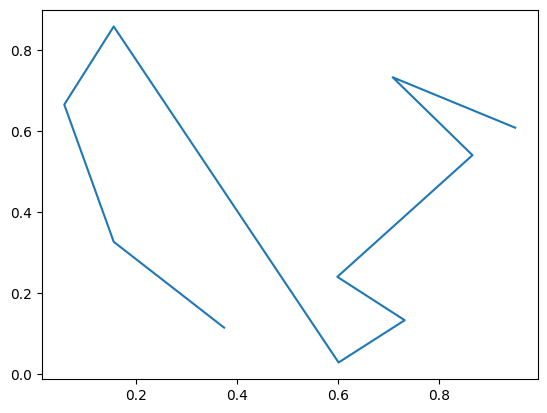

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.array(c).T[0], np.array(c).T[1])